# Analyze activity of single party members

**Aim of notebook:**

create final figure "fig_activity_members.pdf"

Steiglechner & Birk, 06.02.2022

In [1]:
# Packages
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tueplots import bundles

os.chdir('..')

from src.read_data_and_output import load_json, save_json
from src.definitions import PARTIES, BEHAVIOURS
from src.preprocess_text import *
from src.analyze_behaviour import *

In [2]:
# Load all preprocessed plenarprotokoll-texts from the 19th legislative period
pt_preprocessed_json = load_json('pt_preprocessed.json')

# Create behaviour dataframe & analyze on frequency of positive and negative behaviour for each party

In [30]:
def remove_whitespace(x):
        return x.lstrip()

def remove_abg(x):
    return re.sub(r'(Abg\S*) *(.*$)',r'\2',x)


def get_top_5_actors(df: pd.DataFrame, party: str) -> pd.DataFrame:
    """Get top 5 members by activity + rest summed

    Args:
        df (pd.DataFrame): party df
        party (str): party

    Returns:
        pd.DataFrame: value count df
    """
    df_actors = df['Actor'].value_counts()
    top_5 = df_actors[:5]
    rest = df_actors[5:]
    # Sum up all except of top 5
    rest_sum = rest.values.sum()
    column = ['Party','Top 5 members','Top 5 frequency','Rest frequency']
    data = [party,top_5.index.to_list(),top_5.values,rest_sum]
    df_party_top5 = pd.DataFrame(data=[data],columns=column)
    # print(top_5.index)
    return df_party_top5
    
    

In [4]:
i = 0
columns = ["Behaviour ID","Protocol ID", "Activity ID","Speaker","Party","Actor","Behaviour","Content"]
df_behaviour_all = pd.DataFrame(columns=columns)
# Create one df with behavirous
for key in pt_preprocessed_json.keys():
    print(i, end=" ")
    # Get one temp protocol
    pt_temp = pt_preprocessed_json[key]
    # Create behaviour df temp
    df_behaviour_temp = create_df_behaviour(pt_temp,PARTIES,BEHAVIOURS)
    df_behaviour_all = df_behaviour_all.append(df_behaviour_temp)
    # if i == 5:
    #     break
    i += 1

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 

In [31]:
# sort out all single member activites
df_actors_all = df_behaviour_all[(df_behaviour_all["Actor"] != 'all') & (df_behaviour_all["Actor"] != 'abgeordneten')]
df_actors_all['Actor'] = df_actors_all['Actor'].apply(remove_whitespace)
df_actors_all['Actor'] = df_actors_all['Actor'].apply(remove_abg)
# Get activity ranking for each party
column = ['Party','Top 5 members','Top 5 frequency','Rest frequency']
df_parties_top5_actors = pd.DataFrame(columns=column)
for party in PARTIES:
    df_party = df_actors_all[df_actors_all['Party'] == party]
    df_party_actors = get_top_5_actors(df_party,party)
    # append all party top5 to one df
    df_parties_top5_actors = df_parties_top5_actors.append(df_party_actors)

C:\Users\fbirk\AppData\Local\Temp/ipykernel_18728/1698798614.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actors_all['Actor'] = df_actors_all['Actor'].apply(remove_whitespace)
C:\Users\fbirk\AppData\Local\Temp/ipykernel_18728/1698798614.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_actors_all['Actor'] = df_actors_all['Actor'].apply(remove_abg)


In [6]:
# df_parties_top5_actors, 'fraktionslos' not included
top1 = []
top2 = []
top3 = []
top4 = []
top5 = []
rest_actors = []
for num in range(6):
    top1.append(df_parties_top5_actors['Top 5 frequency'].values[num][0])
    top2.append(df_parties_top5_actors['Top 5 frequency'].values[num][1])
    top3.append(df_parties_top5_actors['Top 5 frequency'].values[num][2])
    top4.append(df_parties_top5_actors['Top 5 frequency'].values[num][3])
    top5.append(df_parties_top5_actors['Top 5 frequency'].values[num][4])
    rest_actors.append(df_parties_top5_actors['Rest frequency'].values[num])

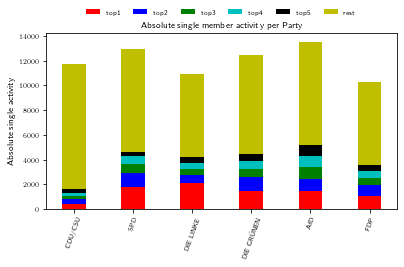

In [37]:
# dataset to numpy
dataset1 = np.array(top1)
dataset2 = np.array(top2)
dataset3 = np.array(top3)
dataset4 = np.array(top4)
dataset5 = np.array(top5)
dataset_rest = np.array(rest_actors)
ind = np.arange(6)
width = 0.4

# Plot with tueplots
with plt.rc_context(bundles.neurips2021()):
    fig, axs = plt.subplots()
    # print(ind, dataset1)
    p1 = plt.bar(ind, dataset1, width, color='r')
    p2 = plt.bar(ind, dataset2, width, bottom=dataset1, color='b')
    p3 = plt.bar(ind, dataset3, width, bottom=dataset1+dataset2, color='g')
    p4 = plt.bar(ind, dataset4, width, bottom=dataset1+dataset2+dataset3, color='c')
    p5 = plt.bar(ind, dataset5, width, bottom=dataset1+dataset2+dataset3+dataset4, color='k')
    prest = plt.bar(ind, dataset_rest, width, bottom=dataset1+dataset2+dataset3+dataset4+dataset5, color='y')
    plt.title("Absolute single member activity per Party")
    plt.ylabel("Absolute single activity")
    x_ticks_labels = PARTIES[:-1]
    x_ticks_labels[3] = 'DIE GRÜNEN' 
    plt.xticks(ticks=ind,labels=x_ticks_labels, rotation=70,fontweight='bold')
    legend_label = ['top1','top2','top3','top4','top5','rest',]
    fig.legend(legend_label, ncol = 7,bbox_to_anchor=([0.9, 1.06, 0, 0]), frameon = False)
    # plt.legend(legend_label)
    fig.savefig("doc/fig_activity_members.pdf",bbox_inches='tight')